In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats.distributions import gamma
import numpy as np
import seaborn as sns
import scipy.stats
import scipy.optimize
import math
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


warnings.filterwarnings(action='ignore')
sns.set_theme(palette = "bright")

In [2]:
def load_data():
    df = pd.read_csv('datasets/weatherHistory.csv')
    return df
def clean_data(df):
    df=df.drop(['Formatted Date','Daily Summary','Loud Cover'],axis=1)
    df=df.dropna()
    return df
def one_hot_encode(df):
    encoderS=OneHotEncoder(sparse=False)
    dfS=pd.DataFrame(encoderS.fit_transform(df[['Summary']]))
    dfS.columns = encoderS.get_feature_names_out(['Summary'])
    dfS=dfS.drop(['Summary_Windy and Partly Cloudy'],axis=1)

    encoderP=OneHotEncoder(sparse=False)
    dfP=pd.DataFrame(encoderP.fit_transform(df[['Precip Type']]))
    dfP.columns = encoderP.get_feature_names_out(['Precip Type'])
    dfP=dfP.drop(['Precip Type_snow'],axis=1)

    df=df.drop(['Summary','Precip Type'],axis=1)

    df= pd.concat([dfS, dfP, df ], axis=1)
    return df

def normalization(df):
    standardScalerT=StandardScaler()
    df['Temperature (C)']=standardScalerT.fit_transform(df[['Temperature (C)']])

    standardScalerA=StandardScaler()
    df['Apparent Temperature (C)']=standardScalerA.fit_transform(df[['Apparent Temperature (C)']])

    standardScalerH=StandardScaler()
    df['Humidity']=standardScalerH.fit_transform(df[['Humidity']])

    standardScalerWS=StandardScaler()
    df['Wind Speed (km/h)']=standardScalerWS.fit_transform(df[['Wind Speed (km/h)']])

    standardScalerWB=StandardScaler()
    df['Wind Bearing (degrees)']=standardScalerWB.fit_transform(df[['Wind Bearing (degrees)']])

    standardScalerV=StandardScaler()
    df['Visibility (km)']=standardScalerV.fit_transform(df[['Visibility (km)']])

    standardScalerP=StandardScaler()
    df['Pressure (millibars)']=standardScalerP.fit_transform(df[['Pressure (millibars)']])
    
    df=df.dropna()
    
    return df

def drop_discrete(df):
    df=df.drop(list_discr,axis=1)
    return df


In [3]:
# df = pd.read_csv('datasets/weatherHistory.csv')
df = load_data()
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
n = round(1 + 3.32 * math.log(df.shape[0]))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.3+ MB


In [4]:
list_discr = ['Summary','Precip Type']
list_cont = ['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)',
             'Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']

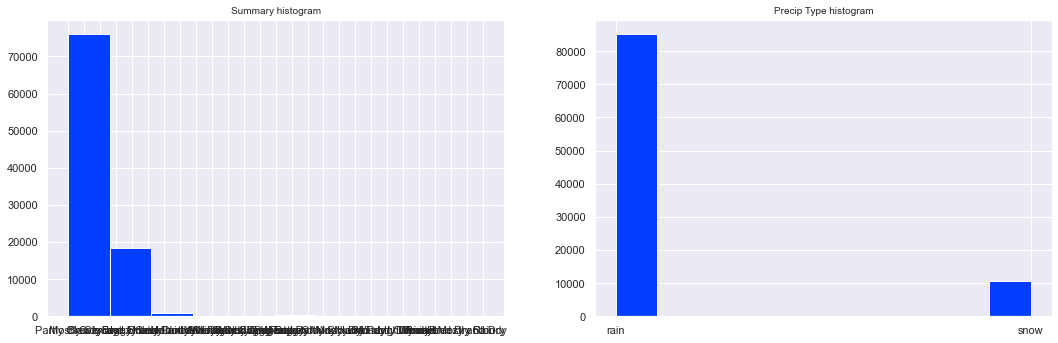

In [ ]:
plt.figure(figsize=(18,12))
    
for i in list_discr:
    plt.subplot(2,2,list_discr.index(i)+1)
    plt.subplots_adjust(hspace=0.2)
    plt.title(i + ' histogram', fontsize=10)
    df[i].hist()

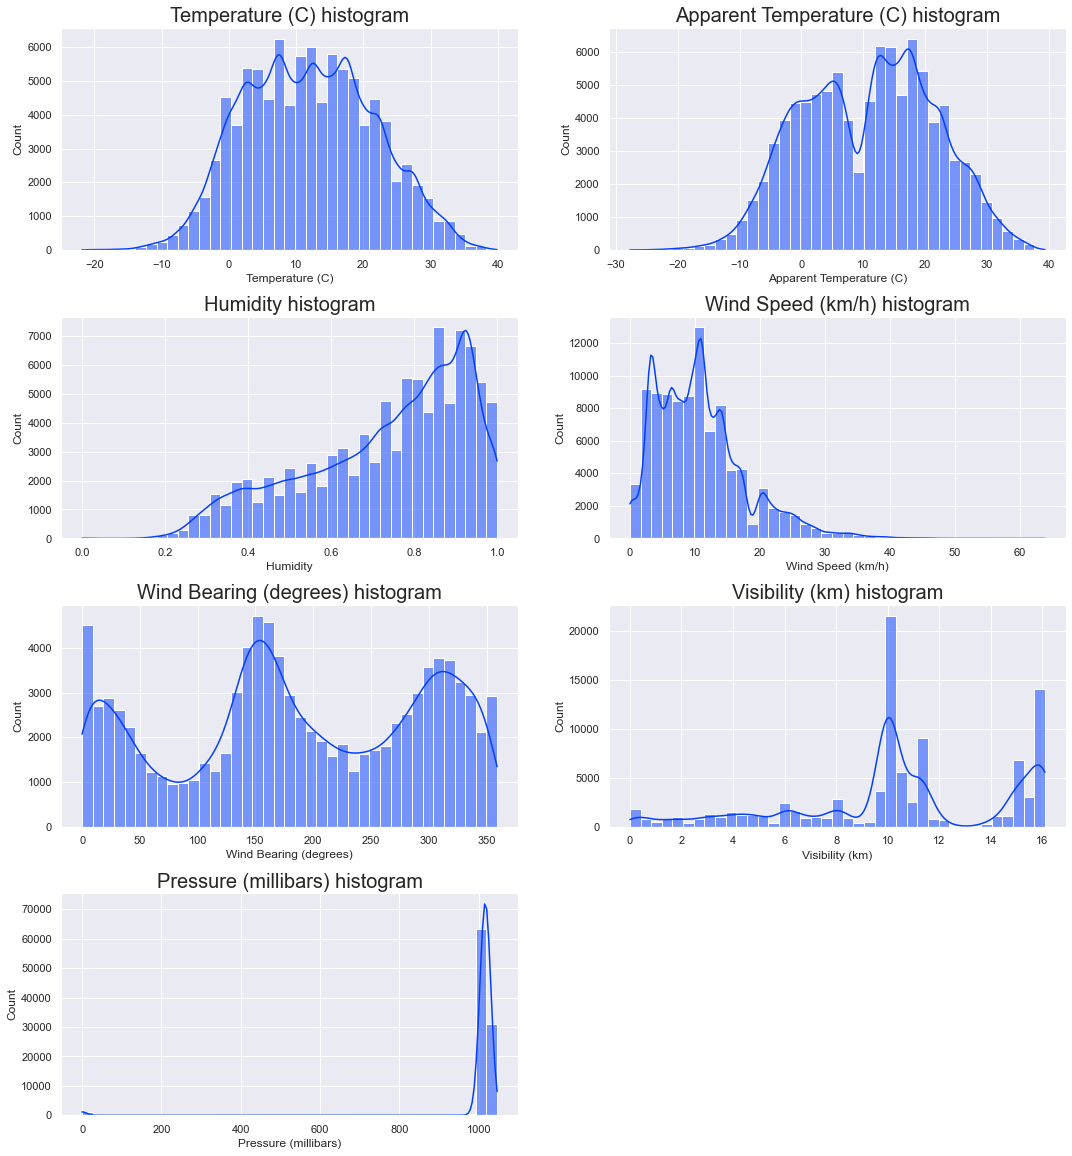

In [ ]:
plt.figure(figsize=(18,20))

for i in list_cont:
    plt.subplot(4,2,list_cont.index(i)+1)
    plt.subplots_adjust(hspace=0.3)
    plt.title(i + ' histogram', fontsize=20)
    sns.histplot(data=df, x=i, kde=True, bins=n)

In [ ]:
df[list_cont].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


<AxesSubplot:>

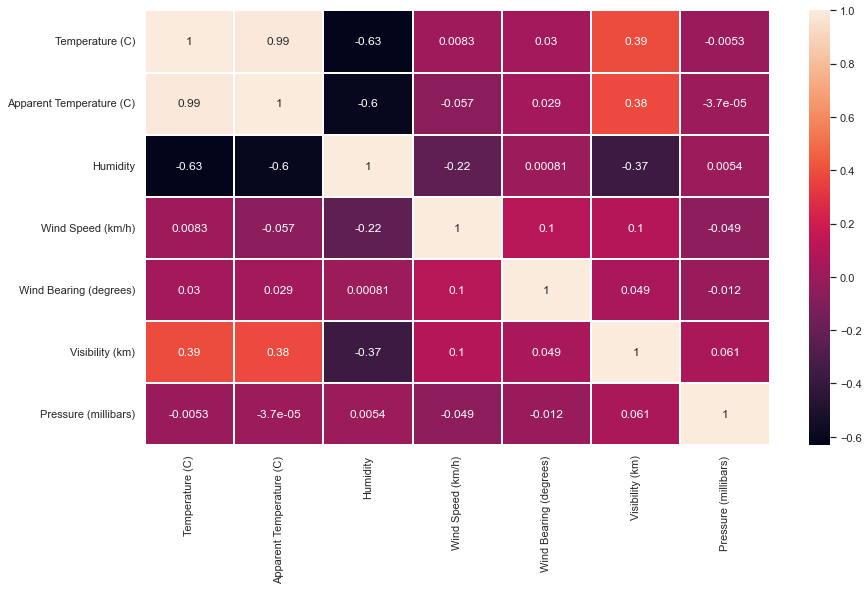

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df[list_cont].corr(),annot=True, linewidths=0.25)

<Figure size 1296x864 with 0 Axes>

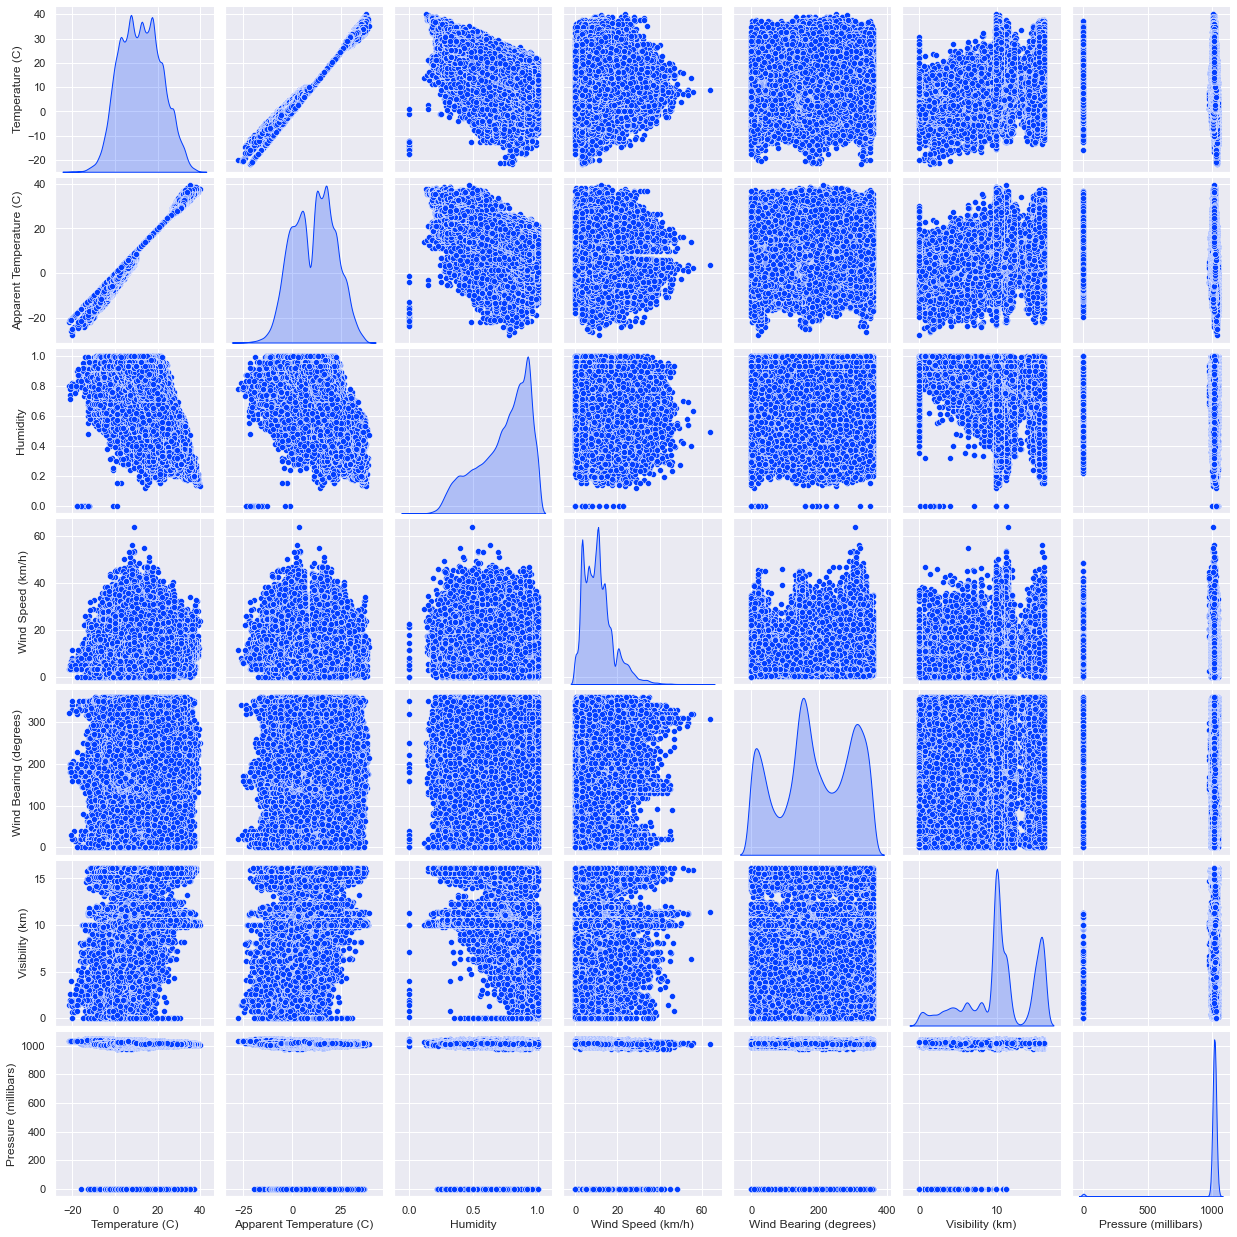

In [ ]:
plt.figure(figsize=(18,12))

sns.pairplot(df[list_cont], diag_kind='kde')

In [ ]:
df.head()

,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,...,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Precip Type_rain,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.257951,-0.324102,0.792748,0.478964,0.591157,1.309107,0.102152
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.270141,-0.339134,0.639470,0.499902,0.665655,1.309107,0.106415
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.267819,-0.138532,0.792748,-0.993620,0.153478,1.100806,0.109058
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.381594,-0.458873,0.486192,0.476638,0.758778,1.309107,0.113066
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.332833,-0.362460,0.486192,0.034630,0.665655,1.309107,0.113919


In [6]:
df = load_data()
df = clean_data(df)
df = one_hot_encode(df)
# df = drop_discrete(df)
df = normalization(df)
df = df.drop(['Apparent Temperature (C)'],axis=1)

In [7]:
Y=df[['Visibility (km)']]
X=df.drop(['Visibility (km)'],axis=1)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
regLR=LinearRegression()
regLR.fit(X_train,Y_train)
yPredRegLR=regLR.predict(X_test)

mae_LR = mean_absolute_error(Y_test, regLR.predict(X_test))
mse_LR = mean_squared_error(Y_test, regLR.predict(X_test))
r2_LR = r2_score(Y_test, regLR.predict(X_test))

print('Mean Absolute Error: {:.3f}'.format(mae_LR))
print('Mean Squared Error: {:.3f}'.format(mse_LR))
print('R2 Score: {:.3f}'.format(r2_LR))

Mean Absolute Error: 0.742
Mean Squared Error: 0.817
R2 Score: 0.186


In [19]:
regSVR=SVR(kernel='linear')
regSVR.fit(X_train,Y_train)
yPredRegSVR=regSVR.predict(X_test)

mae_SVR = mean_absolute_error(Y_test, regSVR.predict(X_test))
mse_SVR = mean_squared_error(Y_test, regSVR.predict(X_test))
r2_SVR = r2_score(Y_test, regSVR.predict(X_test))

print('Mean Absolute Error: {:.3f}'.format(mae_SVR))
print('Mean Squared Error: {:.3f}'.format(mse_SVR))
print('R2 Score: {:.3f}'.format(r2_SVR))



Mean Absolute Error: 0.725
Mean Squared Error: 0.861
R2 Score: 0.142


In [10]:
regDTR=DecisionTreeRegressor()
regDTR.fit(X_train,Y_train)
yPredRegDTR=regDTR.predict(X_test)

mae_DTR = mean_absolute_error(Y_test, regDTR.predict(X_test))
mse_DTR = mean_squared_error(Y_test, regDTR.predict(X_test))
r2_DTR = r2_score(Y_test, regDTR.predict(X_test))

print('Mean Absolute Error: {:.3f}'.format(mae_DTR))
print('Mean Squared Error: {:.3f}'.format(mse_DTR))
print('R2 Score: {:.3f}'.format(r2_DTR))

Mean Absolute Error: 0.651
Mean Squared Error: 0.892
R2 Score: 0.111


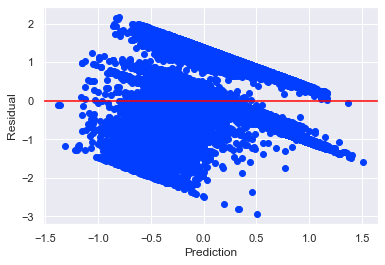

In [28]:
Y_pred = regLR.predict(X_test)
plt.scatter(x=Y_pred, y=Y_red)

plt.ylabel("Residual")
plt.xlabel("Prediction")

plt.axhline(y=0, color = 'Red')

In [31]:
Y_logits = np.array(regLR.predict(X_test))
Y_target = np.array(Y_test)

In [32]:
data = Y_target - Y_logits

In [25]:
data

array([[-0.33494706],
       [ 1.3384777 ],
       [-0.52598408],
       ...,
       [-0.98986886],
       [-0.40471089],
       [ 0.0144411 ]])

<AxesSubplot:ylabel='Count'>

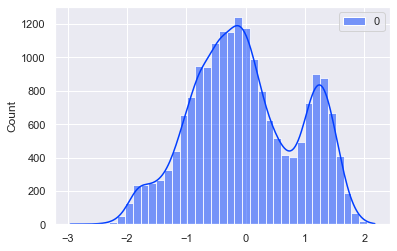

In [33]:
sns.histplot(data=data, bins = n, kde=True, palette ='bright', label = 'remnants')

In [44]:
def return_biplot(array, distribution):
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    args = distribution.fit(array)
    scipy.stats.probplot(array, dist=distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[0].set_marker('o')
    
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    
    plt.show()



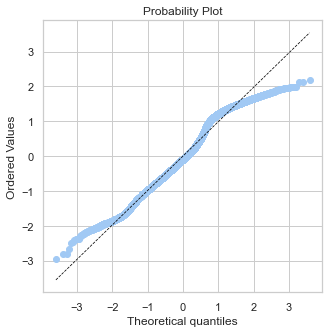

In [51]:
return_biplot(data, scipy.stats.norm)

In [83]:
from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
import networkx as nx
from pgmpy.estimators import HillClimbSearch, K2Score, BicScore

In [84]:
dff = df.copy()

In [85]:
dff

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-0.257951,0.792748,0.478964,0.591157,1.309107,0.102152
1,-0.270141,0.639470,0.499902,0.665655,1.309107,0.106415
2,-0.267819,0.792748,-0.993620,0.153478,1.100806,0.109058
3,-0.381594,0.486192,0.476638,0.758778,1.309107,0.113066
4,-0.332833,0.486192,0.034630,0.665655,1.309107,0.113919
...,...,...,...,...,...,...
96448,1.470719,-1.557511,0.027651,-1.457551,1.374684,0.095586
96449,1.320955,-1.302048,-0.102625,-1.559986,1.243531,0.102407
96450,1.055095,-0.893308,-0.263144,-1.466863,1.374684,0.106671
96451,1.001110,-0.688937,-0.039813,-1.559986,1.374684,0.109144


In [86]:
dff['Temperature (C)'] = pd.qcut(dff['Temperature (C)'], 10, labels=False)
dff['Humidity'] = pd.qcut(dff['Humidity'], 10, labels=False)
dff['Wind Speed (km/h)'] = pd.qcut(dff['Wind Speed (km/h)'], 10, labels=False)
dff['Wind Bearing (degrees)'] = pd.dff(df_new['Wind Bearing (degrees)'], 10, labels=False)
dff['Visibility (km)'] = pd.qcut(dff['Visibility (km)'], 10, labels=False)
dff['Pressure (millibars)'] = pd.qcut(dff['Pressure (millibars)'], 10, labels=False)

In [97]:
edges_list = []

model = BayesianModel(edges_list)

In [98]:
hc_search = HillClimbSearch(data=dff)
hc_k2 = hc_search.estimate(scoring_method=K2Score(dff))
hc_bic = hc_search.estimate(scoring_method=BicScore(dff))

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

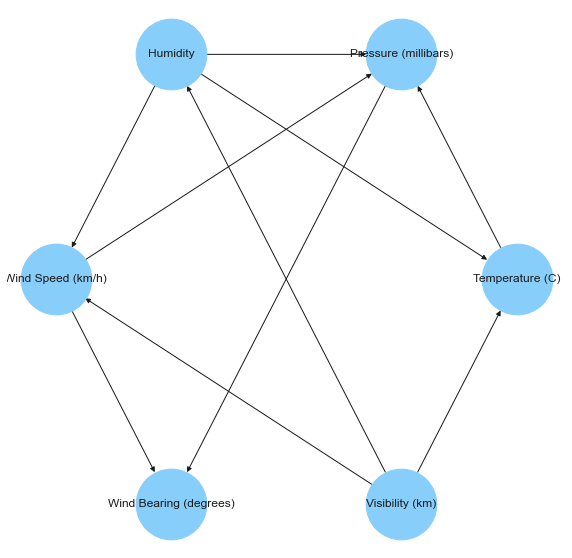

In [99]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(hc_k2.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

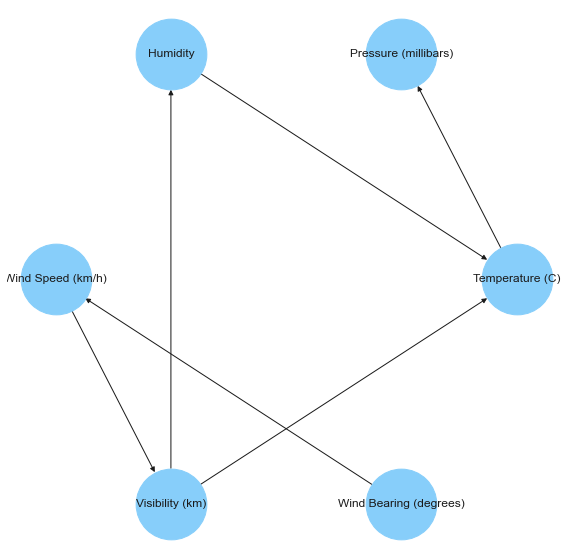

In [100]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(hc_bic.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

In [101]:
def bn_sample(model, data):
    model_s = BayesianModel(model.edges())
    model_s.fit(data)
    
    sampling = BayesianModelSampling(model_s)
    sample = sampling.forward_sample(size = data.shape[0])
    return sample

In [103]:
sample_k2 = bn_sample(hc_k2, df_new)
sample_bic = bn_sample(hc_bic, df_new)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [104]:
mae_k2 = mean_absolute_error(dff['Visibility (km)'], sample_k2['Visibility (km)'])
mse_k2 = mean_squared_error(dff['Visibility (km)'], sample_k2['Visibility (km)'])
r2_k2 = r2_score(dff['Visibility (km)'], sample_k2['Visibility (km)'])

print('Mean Absolute Error: {:.3f}'.format(mae_k2))
print('Mean Squared Error: {:.3f}'.format(mse_k2))
print('R2 Score: {:.3f}'.format(r2_k2))

Mean Absolute Error: 3.276
Mean Squared Error: 16.393
R2 Score: -0.994


In [105]:
mae_bic = mean_absolute_error(dff['Visibility (km)'], sample_bic['Visibility (km)'])
mse_bic = mean_squared_error(dff['Visibility (km)'], sample_bic['Visibility (km)'])
r2_bic = r2_score(dff['Visibility (km)'], sample_bic['Visibility (km)'])

print('Mean Absolute Error: {:.3f}'.format(mae_bic))
print('Mean Squared Error: {:.3f}'.format(mse_bic))
print('R2 Score: {:.3f}'.format(r2_bic))

Mean Absolute Error: 3.281
Mean Squared Error: 16.448
R2 Score: -1.000
